In [107]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from tensorflow.data import Dataset
from sklearn import metrics
import math
from IPython import display

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 20
pd.options.display.float_format = '{:.1f}'.format

In [29]:
calHousingDf = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

# shuffle the data ordering so random - remvoe systematic patterns in data (for when sampling)
calHousingDf = calHousingDf.reindex(np.random.permutation(len(calHousingDf)))
calHousingDf['median_house_value']/=1000

calHousingDf['bedrooms_per_house'] = calHousingDf['total_bedrooms'] / calHousingDf['households']
calHousingDf['rooms_per_house'] = calHousingDf['total_rooms'] / calHousingDf['households']
calHousingDf['bedrooms_per_house'] = calHousingDf['bedrooms_per_house'].apply(lambda x: min(x,10))
calHousingDf['rooms_per_house'] = calHousingDf['rooms_per_house'].apply(lambda x: min(x,12));


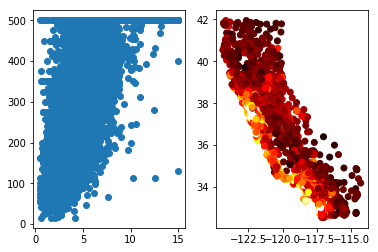

In [30]:
plt.subplot(1, 2, 1)
plt.scatter(calHousingDf['median_income'], calHousingDf['median_house_value'])
plt.subplot(1, 2, 2)
plt.scatter(calHousingDf['longitude'], calHousingDf['latitude'], color=cm.hot(calHousingDf['median_house_value']/500))
plt.show()

In [3]:
calHousingDf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_house,rooms_per_house
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3,1.1,5.4
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0,0.4,1.4
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0,0.3,0.8
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4,1.0,4.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4,1.0,5.2
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0,1.1,6.1
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0,10.0,12.0


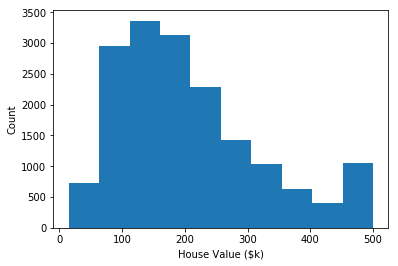

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_house,rooms_per_house
69,-115.5,33.0,33.0,2266.0,365.0,952.0,360.0,5.4,143.0,1.0,6.3
16230,-122.5,37.7,52.0,2453.0,508.0,1056.0,453.0,3.7,311.8,1.1,5.4
2319,-117.5,34.1,24.0,2831.0,478.0,1582.0,435.0,4.3,195.6,1.1,6.5
4393,-118.0,33.7,23.0,5554.0,995.0,2408.0,936.0,5.4,331.9,1.1,5.9
5557,-118.2,34.0,23.0,1991.0,584.0,1380.0,535.0,1.9,181.9,1.1,3.7
13223,-121.9,37.3,26.0,3756.0,553.0,1408.0,535.0,5.6,320.0,1.0,7.0
7856,-118.4,34.2,37.0,1404.0,266.0,889.0,274.0,4.0,190.0,1.0,5.1
10231,-119.9,37.9,18.0,473.0,115.0,88.0,41.0,4.1,137.5,2.8,11.5
9262,-119.1,36.4,31.0,1533.0,361.0,1518.0,386.0,1.6,51.7,0.9,4.0
16034,-122.4,37.7,48.0,2675.0,585.0,1773.0,540.0,4.0,268.5,1.1,5.0


In [31]:
histData = np.histogram(calHousingDf['median_house_value'].values)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(calHousingDf['median_house_value'].values, histtype ='stepfilled')
ax.set_xlabel('House Value ($k)')
ax.set_ylabel('Count')
plt.show()

calHousingDf

In [285]:
''' '''

def pandas_import_func(featureData, targetVals, batchSize=1, doShuffle=True, numEpochs=None):
    """
    Trains a linear regression model of one feature.
    Args:
      featureData: pandas DataFrame of data
      targetVals: pandas DataFrame of targets
      batchSize: Size of batches to be passed to the model
      doShuffle: bool. Whether to shuffle the data.
      numEpochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """   
    
    # a couple ways of doing this, didn't know u could do this with dicts, but it's same as array list comprehension
    # column of dataframe is pandas series object, np.array(series) == series.values
    #takes like: df[ ['feature_col1', 'feature_col2'] ] and converts to: {'feature_col1':[np_feature_data_array_1], ... }
    #featureData = {key:np.array(value) for key,value in dict(featureData).items()}
    #featureData = {featureCol: pdSeries.values for featureCol,pdSeries in dict(featureData).items()}
    featureData = {feature: featureData[feature].values for feature in featureData.keys()}
    
    #create an object
    ds = Dataset.from_tensor_slices( (featureData,targetVals) )
    ds = ds.batch(batchSize).repeat(numEpochs)
    if doShuffle:
        ds = ds.shuffle(buffer_size=10000)
        
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels


def train_model(learningRate, stepCount, batchSize, featureLabel, targetLabel):
    """
    Trains a linear regression model of one feature.

    Args:
    learningRate: A `float`, the learning rate.
    stepCount: A non-zero `int`, the total number of training stepCount. A training step consists of a forward and backward pass using a single batch.
    batchSize: A non-zero `int`, the batch size.
    inputFeature: A `string` specifying a column from calHousingDf to use as input feature.
    """

    periods = 10
    stepsPerPeriod = stepCount / periods

    featureData = calHousingDf[[featureLabel]]
    targetVals = calHousingDf[targetLabel]

    # Create feature columns
    featureColumns = [tf.feature_column.numeric_column(featureLabel)]

    # this just gives us a shorter reference (lhs) to the full input function (rhs)
    trainInputFunc = lambda: pandas_import_func(featureData, targetVals, batchSize=batchSize)
    predInputFunc = lambda: pandas_import_func(featureData, targetVals, doShuffle=False, numEpochs=1)

    # Create a linear regressor object
    tfOptimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
    tfOptimizer = tf.contrib.estimator.clip_gradients_by_norm(tfOptimizer, 5.0)
    linearReg = tf.estimator.LinearRegressor(feature_columns=featureColumns, optimizer=tfOptimizer)

    
    # plot a subset of the feature data. We'll superimpose some fit lines below
    fig = plt.figure(figsize=(15, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title("Learned Line After Each Period")
    ax1.set_ylabel(targetLabel)
    ax1.set_xlabel(featureLabel)

    sample = calHousingDf.sample(n=300)
    ax1.scatter(sample[featureLabel], sample[targetLabel])
    #colors = [cm.coolwarm(x) for x in np.linspace(0, 1, periods)]

    # Train the model inside a loop so that we can periodically assess error
    print("Training model...")
    print("RMS Error after each period (set of iterations):")
    rmsErrors = []
    for period in range(0, periods):
        # Train the model, starting from the prior state.
        linearReg.train(input_fn=trainInputFunc, steps=stepsPerPeriod)

        # compute predictions.
        predictions = linearReg.predict(input_fn=predInputFunc)
        predictions = np.array([item['predictions'][0] for item in predictions])

        # Compute loss.
        rmsError = math.sqrt(metrics.mean_squared_error(predictions, targetVals))

        # Occasionally print the current loss.
        print("  period {:02d} : {:.2f}".format(period, rmsError))

        # Add the loss metrics from this period to our list.
        rmsErrors.append(rmsError)

        weight = linearReg.get_variable_value('linear/linear_model/{0}/weights'.format(featureLabel))[0]
        bias = linearReg.get_variable_value('linear/linear_model/bias_weights')
        #print(targetLabel,'=',weight,'*',featureLabel,'+',bias)
        print('{:s} = {:.2f} * {:s} + {:.1f}'.format(targetLabel, weight[0], featureLabel, bias[0]))

        # this seems awkwarder than it could be
        yBounds = np.array([0, sample[targetLabel].max()])
        xBounds = (yBounds - bias) / weight
        xBounds = np.maximum( np.minimum(xBounds, sample[featureLabel].max()) , sample[featureLabel].min() )
        yBounds = weight * xBounds + bias
        
        #ax1.plot(xBounds, yBounds, color=colors[period])
        ax1.plot(xBounds, yBounds, color=cm.coolwarm(period/(periods-.99)))
        

    print('Model training finished')

    # Output a plot of loss metrics over periods.
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_ylabel('RMS Error')
    ax2.set_xlabel('Periods')
    ax2.set_title('Convergence')
    ax2.plot(rmsErrors)
    plt.tight_layout()  #don't clip axes labels
    

    # Output a table with calibration data.
    accuracyDf = pd.DataFrame()
    accuracyDf['predictions'] = pd.Series(predictions)
    accuracyDf['targets'] = pd.Series(targetVals)
    display.display(accuracyDf.describe())

    print('Final RMSE (on training data): {:0.2f}'.format(rmsError) )

In [ ]:
featureLabel='rooms_per_house', targetLabel='median_house_value'
print("{:s} = {:.2f} * {:s} + {:.1f}".format(targetLabel, weight, featureLabel, bias))

Training model...
RMS Error after each period (set of iterations):
  period 00 : 179.00
median_house_value = 12.29 * rooms_per_house + 2.2
  period 01 : 143.43
median_house_value = 21.14 * rooms_per_house + 3.9
  period 02 : 124.32
median_house_value = 27.51 * rooms_per_house + 5.1
  period 03 : 119.09
median_house_value = 29.99 * rooms_per_house + 5.6
  period 04 : 118.22
median_house_value = 30.47 * rooms_per_house + 5.8
  period 05 : 114.37
median_house_value = 33.41 * rooms_per_house + 6.4
  period 06 : 113.15
median_house_value = 35.37 * rooms_per_house + 6.8
  period 07 : 113.63
median_house_value = 34.37 * rooms_per_house + 6.7
  period 08 : 113.03
median_house_value = 35.77 * rooms_per_house + 6.9
  period 09 : 113.90
median_house_value = 33.85 * rooms_per_house + 7.2
Model training finished


,predictions,targets
count,17000.0,17000.0
mean,188.3,207.3
std,46.9,116.0
min,35.8,15.0
25%,157.6,119.4
50%,184.4,180.4
75%,212.2,265.0
max,413.4,500.0


Final RMSE (on training data): 113.90


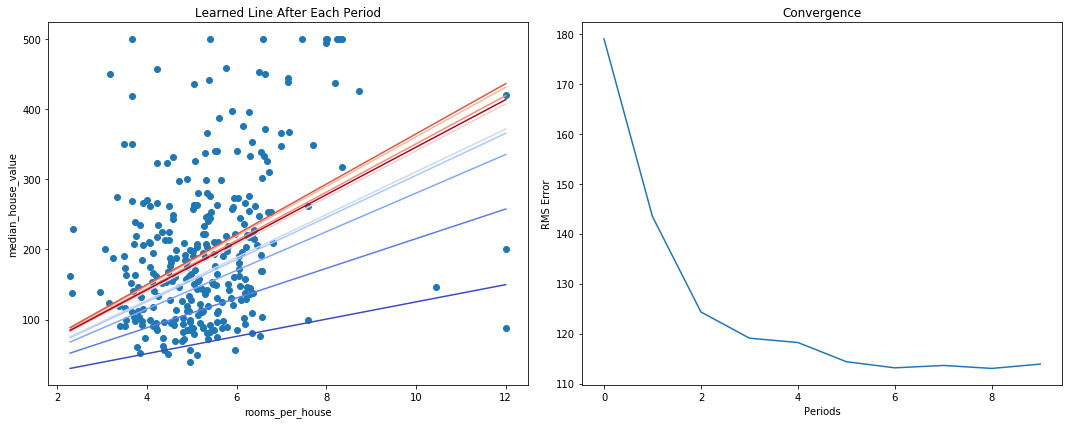

In [289]:
train_model(learningRate=0.05, stepCount=500, batchSize=10, featureLabel='rooms_per_house', targetLabel='median_house_value')

In [262]:
minIdx = calHousingDf['rooms_per_house'].idxmin()
calHousingDf.iloc[minIdx]

longitude            -118.4
latitude               34.3
housing_median_age     46.0
total_rooms            11.0
total_bedrooms         11.0
population             24.0
households             13.0
median_income           2.9
median_house_value    162.5
bedrooms_per_house      0.8
rooms_per_house         0.8
Name: 8188, dtype: float64

In [4]:
#calHousingDf = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
calHousingDf = pd.read_csv('C:/Users/m/Downloads/california_housing_train.csv', sep=',')

# shuffle the data ordering so random - remvoe systematic patterns in data (for when sampling)
calHousingDf = calHousingDf.reindex(np.random.permutation(len(calHousingDf)))
calHousingDf['median_house_value']/=1000

calHousingDf['bedrooms_per_house'] = calHousingDf['total_bedrooms'] / calHousingDf['households']
calHousingDf['rooms_per_house'] = calHousingDf['total_rooms'] / calHousingDf['households']
calHousingDf['bedrooms_per_house'] = calHousingDf['bedrooms_per_house'].apply(lambda x: min(x,10))
calHousingDf['rooms_per_house'] = calHousingDf['rooms_per_house'].apply(lambda x: min(x,12))


N = len(calHousingDf)
trainingCount = 12000
validationCount = N - trainingCount 

trainingExamples = calHousingDf.head(trainingCount)
trainingTargets = calHousingDf.head(trainingCount)

validationExamples = calHousingDf.tail(validationCount)
validationTargets = calHousingDf.tail(validationCount)


Training model...
RMS Error after each period (set of iterations):
  period 00 : 232.72  :  233.41
[('bedrooms_per_house', 0.103904225), ('bedrooms_per_house', 1.2203588), ('bedrooms_per_house', -11.478285), ('bias_weights', 0.10154853), ('bias_weights', 1.0738266), ('bias_weights', -10.523028), ('latitude', 0.12739341), ('latitude', 1227.7235), ('latitude', -446.3723), ('median_income', 0.12459619), ('median_income', 20.382286), ('median_income', -56.25113)]
  period 01 : 230.59  :  231.30
[('bedrooms_per_house', 0.16042122), ('bedrooms_per_house', 2.3413472), ('bedrooms_per_house', -24.546793), ('bias_weights', 0.15820475), ('bias_weights', 2.0631084), ('bias_weights', -22.72378), ('latitude', 0.18576236), ('latitude', 2455.56), ('latitude', -920.51953), ('median_income', 0.18107341), ('median_income', 40.43531), ('median_income', -115.14236)]
  period 02 : 228.97  :  229.68
[('bedrooms_per_house', 0.20458749), ('bedrooms_per_house', 3.4875836), ('bedrooms_per_house', -38.206863), ('

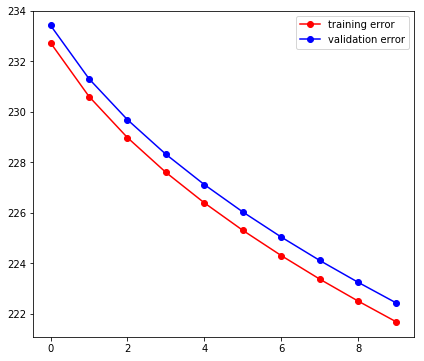

In [153]:
''' Currently the good stand-alone cell '''

def read_cal_housing_data(dataSource='C:/Users/m/Downloads/california_housing_train.csv'):
    calHousingDf = pd.read_csv(dataSource, sep=',')
    calHousingDf = calHousingDf.reindex(np.random.permutation(len(calHousingDf)))
    calHousingDf['median_house_value'] = calHousingDf['median_house_value']/1000
    calHousingDf['bedrooms_per_house'] = calHousingDf['total_bedrooms'] / calHousingDf['households']
    calHousingDf['rooms_per_house'] = calHousingDf['total_rooms'] / calHousingDf['households']
    calHousingDf['bedrooms_per_house'] = calHousingDf['bedrooms_per_house'].apply(lambda x: min(x,10))
    calHousingDf['rooms_per_house'] = calHousingDf['rooms_per_house'].apply(lambda x: min(x,12))
    return calHousingDf

# works with featureData as either a list of feature labels or a dataframe with (include all columns from the dataframe)
def construct_feature_columns(featureData):
    return set([tf.feature_column.numeric_column(featureKey) for featureKey in featureData])  #same as ...in featureData.columns


def pandas_import_func(featureData, targetVals, batchSize=1, doShuffle=True, numEpochs=None):
    """
    Trains a linear regression model of one feature.
    Args:
      featureData: pandas DataFrame of data
      targetVals: pandas DataFrame of targets
      batchSize: Size of batches to be passed to the model
      doShuffle: bool. Whether to shuffle the data.
      numEpochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """   
    featureData = {feature: featureData[feature].values for feature in featureData.keys()}
    
    #create an object
    ds = Dataset.from_tensor_slices( (featureData,targetVals) )
    ds = ds.batch(batchSize).repeat(numEpochs)
    if doShuffle:
        ds = ds.shuffle(buffer_size=10000)
        
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

def get_regression_weights(linearRegressor):
        varNames = linearRegressor.get_variable_names()
        weights = [linearRegressor.get_variable_value(name) for name in varNames]
        friendlyVarNames = [name.split('/')[2] for name in varNames[1:]]
        friendlyWeights = [w.flatten()[0] for w in weights[1:]]    
        return list(zip(friendlyVarNames, friendlyWeights))

def train_model(learningRate, stepCount, periods, batchSize, trainingExamples, trainingTargets, validationExamples, validationTargets):
    """
    Trains a linear regression model of one feature.

    Args:
    learningRate [float]: the learning rate
    stepCount [int, >0]: the total number of training stepCount. A training step consists of a forward and backward pass using a single batch.
    batchSize [int, >0]: the batch size.
    inputFeature: A `string` specifying a column from calHousingDf to use as input feature.
    """
    stepsPerPeriod = stepCount / periods
    featureColumns = construct_feature_columns(trainingExamples)

    # this just gives us a shorter reference (lhs) to the full input function (rhs)
    trainInputFunc = lambda: pandas_import_func(trainingExamples, trainingTargets, batchSize=batchSize)
    predTrainingFunc = lambda: pandas_import_func(trainingExamples, trainingTargets, doShuffle=False, numEpochs=1)
    predValidationFunc = lambda: pandas_import_func(validationExamples, validationTargets, doShuffle=False, numEpochs=1)
    
    # Create a linear regressor object
    tfOptimizer = tf.train.FtrlOptimizer(learning_rate=learningRate)
    tfOptimizer = tf.contrib.estimator.clip_gradients_by_norm(tfOptimizer, 5.0)
    linearReg = tf.estimator.LinearRegressor(feature_columns=featureColumns, optimizer=tfOptimizer)

    # Train the model inside a loop so that we can periodically assess error
    print("Training model...")
    print("RMS Error after each period (set of iterations):")
    rmsErrorsTrain = []
    rmsErrorsValid = []
    for period in range(periods):
        # Train the model, starting from the prior state
        linearReg.train(input_fn=trainInputFunc, steps=stepsPerPeriod)

        trainingPredictions = linearReg.predict(input_fn=predTrainingFunc)
        trainingPredictions = np.array([item['predictions'][0] for item in trainingPredictions])
        
        validationPredictions = linearReg.predict(input_fn=predValidationFunc)
        validationPredictions = np.array([item['predictions'][0] for item in validationPredictions])

        # Compute loss.
        rmsErrorTrain = math.sqrt(metrics.mean_squared_error(trainingPredictions, trainingTargets))
        rmsErrorValid = math.sqrt(metrics.mean_squared_error(validationPredictions, validationTargets)) 
        
        # Occasionally print the current loss.
        print('  period {:02d} : {:.2f}  :  {:.2f}'.format(period, rmsErrorTrain, rmsErrorValid))

        # Add the loss metrics from this period to our list.
        rmsErrorsTrain.append(rmsErrorTrain)
        rmsErrorsValid.append(rmsErrorValid)
        
        print(get_regression_weights(linearReg))

    fig = plt.figure(figsize=(15, 6))    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(rmsErrorsTrain, linestyle=None, marker='o', color='r', label='training error')
    ax2.plot(rmsErrorsValid, linestyle=None, marker='o', color='b', label='validation error')
    plt.legend()
    plt.show()
    
    return linearReg


calHousingDf = read_cal_housing_data('C:/Users/m/Downloads/california_housing_train.csv')

#myFeatures = ['latitude', 'longitude', 'housing_median_age', 'rooms_per_house', 'bedrooms_per_house', 'median_income', 'population']
myFeatures = ['latitude', 'median_income', 'bedrooms_per_house']
myTarget = 'median_house_value'
learnRate = 0.01
steps = 500
batch = 5
periods = 10
trainingCount = 12000

N = len(calHousingDf)
validationCount = N - trainingCount 

tExamples = calHousingDf.head(trainingCount)[myFeatures]
tTargets = calHousingDf.head(trainingCount)[myTarget]

vExamples = calHousingDf.tail(validationCount)[myFeatures]
vTargets = calHousingDf.tail(validationCount)[myTarget]

linearModel = train_model(learnRate, steps, periods, batch, tExamples, tTargets, vExamples, vTargets)

Training model...
RMS Error after each period (set of iterations):
  period 00 : 129.14  :  128.77
[('bedrooms_per_house', 16.907623), ('bedrooms_per_house', 152.45973), ('bedrooms_per_house', -208.76619), ('bias_weights', 17.245832), ('bias_weights', 128.19945), ('bias_weights', -195.26628), ('lat_32-33', 7.548663), ('lat_32-33', 2.3225725), ('lat_32-33', -11.504154), ('lat_33-34', 13.229989), ('lat_33-34', 14.059133), ('lat_33-34', -49.606518), ('lat_34-35', 12.560903), ('lat_34-35', 18.243296), ('lat_34-35', -53.650345), ('lat_35-36', 2.7563417), ('lat_35-36', 0.996976), ('lat_35-36', -2.752171), ('lat_36-37', 4.8678436), ('lat_36-37', 1.5340594), ('lat_36-37', -6.0291724), ('lat_37-38', 12.893094), ('lat_37-38', 17.325254), ('lat_37-38', -53.665718), ('lat_38-39', 7.4721446), ('lat_38-39', 3.085619), ('lat_38-39', -13.125517), ('lat_39-40', 2.0940144), ('lat_39-40', 0.29255337), ('lat_39-40', -1.1326149), ('lat_40-41', 2.0617135), ('lat_40-41', 0.25249544), ('lat_40-41', -1.0359889

  period 05 : 82.45  :  83.46
[('bedrooms_per_house', 24.100538), ('bedrooms_per_house', 1031.0026), ('bedrooms_per_house', -773.84973), ('bias_weights', 27.391012), ('bias_weights', 774.0218), ('bias_weights', -762.0521), ('lat_32-33', 8.459243), ('lat_32-33', 81.84812), ('lat_32-33', -76.53073), ('lat_33-34', 21.83703), ('lat_33-34', 317.6909), ('lat_33-34', -389.22073), ('lat_34-35', 24.853687), ('lat_34-35', 392.11835), ('lat_34-35', -492.1522), ('lat_35-36', -2.1440039), ('lat_35-36', 68.91916), ('lat_35-36', 17.798996), ('lat_36-37', -1.3918214), ('lat_36-37', 131.81776), ('lat_36-37', 15.979768), ('lat_37-38', 27.46562), ('lat_37-38', 417.1212), ('lat_37-38', -560.9453), ('lat_38-39', 1.9621533), ('lat_38-39', 111.31942), ('lat_38-39', -20.702291), ('lat_39-40', -4.0471883), ('lat_39-40', 37.703274), ('lat_39-40', 24.850946), ('lat_40-41', -4.5023866), ('lat_40-41', 19.185858), ('lat_40-41', 19.721203), ('lat_41-42', -2.955423), ('lat_41-42', 5.0835285), ('lat_41-42', 6.6634984)

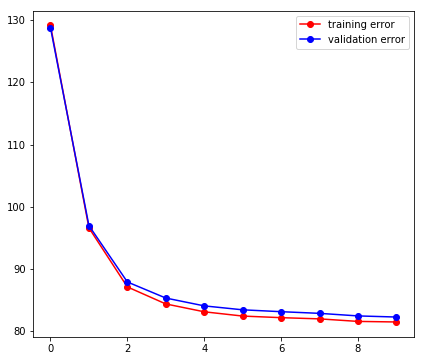

81.685709477938


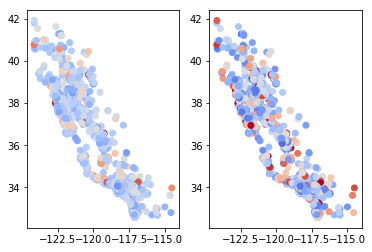

,0,targets
count,3000.0,3000.0
mean,200.3,205.8
std,69.2,113.1
min,64.4,22.5
25%,153.7,121.2
50%,189.7,177.6
75%,232.6,264.0
max,628.4,500.0


In [155]:
def read_cal_housing_data_2(dataSource='C:/Users/m/Downloads/california_housing_train.csv'):
    calHousingDf = pd.read_csv(dataSource, sep=',')
    calHousingDf = calHousingDf.reindex(np.random.permutation(len(calHousingDf)))
    
    featureDf = pd.DataFrame()
    featureDf['bedrooms_per_house'] = calHousingDf['total_bedrooms'] / calHousingDf['households']
    featureDf['median_income'] = calHousingDf['median_income']
    latRanges = zip(range(32, 44), range(33, 45))
    longRanges = zip(range(32, 44), range(33, 45))
    for (latMin, latMax) in latRanges:
        featureDf['lat_{}-{}'.format(latMin,latMax)] = calHousingDf['latitude'].apply(lambda lat: 1 if lat>=latMin and lat<latMax else 0)
    for lRange in longRanges:
        featureDf['long_{}-{}'.format(lRange[0],lRange[1])] = calHousingDf['longitude'].apply(lambda lat: 1 if lat>=lRange[0] and lat<lRange[1] else 0)
    
    targetDf = pd.DataFrame()
    targetDf['median_house_value'] = calHousingDf['median_house_value']/1000
    return featureDf, targetDf

myTarget = 'median_house_value'
learnRate = 1.0
steps = 1000
batch = 5
periods = 10
trainingCount = 12000

N = len(calHousingDf)
validationCount = N - trainingCount 

featureData, targetData = read_cal_housing_data_2('C:/Users/m/Downloads/california_housing_train.csv')
tExamples = featureData.head(trainingCount)
tTargets = targetData.head(trainingCount)[myTarget]

vExamples = featureData.tail(validationCount)
vTargets = targetData.tail(validationCount)[myTarget]

linearModel = train_model(learnRate, steps, periods, batch, tExamples, tTargets, vExamples, vTargets)


testExamples, testTargets = read_cal_housing_data_2('https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv')
testTargets = testTargets[myTarget]
predTestFunc = lambda: pandas_import_func(testExamples, testTargets, doShuffle=False, numEpochs=1)

testPredictions = linearModel.predict(input_fn=predTestFunc)
testPredictions = np.array([item['predictions'][0] for item in testPredictions])

rmsErrorTest = math.sqrt(metrics.mean_squared_error(testPredictions, testTargets))

print(rmsErrorTest)

calHousingDfTest = read_cal_housing_data('https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv')

plt.subplot(1, 2, 1)
plt.scatter(calHousingDfTest['longitude'], calHousingDfTest['latitude'], color=cm.coolwarm(testPredictions/500))
plt.subplot(1, 2, 2)
plt.scatter(calHousingDfTest['longitude'], calHousingDfTest['latitude'], color=cm.coolwarm(testTargets/500))
plt.show()


testStatsDf = pd.DataFrame(testPredictions)
testStatsDf['targets'] = testTargets
testStatsDf.describe()

In [143]:
calHousingDfTest = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv", sep=",")
calHousingDfTest['median_house_value'] = calHousingDfTest['median_house_value']/1000
calHousingDfTest['bedrooms_per_house'] = calHousingDf['total_bedrooms'] / calHousingDf['households']
calHousingDfTest['rooms_per_house'] = calHousingDf['total_rooms'] / calHousingDf['households']
calHousingDfTest['bedrooms_per_house'] = calHousingDf['bedrooms_per_house'].apply(lambda x: min(x,10))
calHousingDfTest['rooms_per_house'] = calHousingDf['rooms_per_house'].apply(lambda x: min(x,12));

testExamples = calHousingDfTest[myFeatures]
testTargets = calHousingDfTest[myTarget]
predTestFunc = lambda: pandas_import_func(testExamples, testTargets, doShuffle=False, numEpochs=1)

testPredictions = linearModel.predict(input_fn=predTestFunc)
testPredictions = np.array([item['predictions'][0] for item in testPredictions])

rmsErrorTest = math.sqrt(metrics.mean_squared_error(testPredictions, testTargets))

print(rmsErrorTest)

plt.subplot(1, 2, 1)
plt.scatter(calHousingDfTest['longitude'], calHousingDfTest['latitude'], color=cm.coolwarm(testPredictions/500))
plt.subplot(1, 2, 2)
plt.scatter(calHousingDfTest['longitude'], calHousingDfTest['latitude'], color=cm.coolwarm(calHousingDfTest['median_house_value']/500))
plt.show()


testStatsDf = pd.DataFrame(testPredictions)
testStatsDf['targets'] = calHousingDfTest['median_house_value']
testStatsDf.describe()

ValueError: Feature lat_32-33 is not in features dictionary.

In [151]:
for val in calHousingDfTest:
    print(val)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
bedrooms_per_house
rooms_per_house


In [77]:
[w if np.isscalar(w) else w[0] for w in weights]

myStr = 'linear/linear_model/rooms_per_house/weights'

[w.flatten()[0] for w in weights]

[100,
 0.00041756325,
 0.00038843352,
 0.011651208,
 0.013815424,
 -0.046503797,
 0.0017455519,
 0.0021470892]

In [119]:
calHousingDf.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_house,rooms_per_house
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1,-0.2
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.0,0.2
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.1,-0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.1,-0.1
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,-0.1,0.6
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,-0.1,0.3
bedrooms_per_house,0.0,0.1,-0.1,0.0,0.1,-0.1,-0.1,-0.1,-0.1,1.0,0.4


In [ ]:
def read_cal_housing_data(dataSource='C:/Users/m/Downloads/california_housing_train.csv'):
    calDf = pd.read_csv(dataSource, sep=',')
    return calDf

def preprocess_features(calDf):
    featureList = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
    selectedFeatures = calDf[featureList]
    processedFeatures = selectedFeatures.copy()
    processedFeatures["rooms_per_person"] = calDf["total_rooms"] / calDf["population"]
    return processed_features

def preprocess_targets(calDf):
    processedTargets = pd.DataFrame()
    processedTargets['median_house_value'] = calDf['median_house_value'] / 1000.0
    return processedTargets

def construct_feature_columns(featureLabelList):
    return set([tf.feature_column.numeric_column(featureLabel) for featureLabel in featureLabelList])

def pandas_import_func(featureData, targetVals, batchSize=1, doShuffle=True, numEpochs=None):
    """
    Trains a linear regression model of one feature.
    Args:
      featureData: pandas DataFrame of data
      targetVals: pandas DataFrame of targets
      batchSize: Size of batches to be passed to the model
      doShuffle: bool. Whether to shuffle the data.
      numEpochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """   
    
    # a couple ways of doing this, didn't know u could do this with dicts, but it's same as array list comprehension
    # column of dataframe is pandas series object, np.array(series) == series.values
    #takes like: df[ ['feature_col1', 'feature_col2'] ] and converts to: {'feature_col1':[np_feature_data_array_1], ... }
    #featureData = {key:np.array(value) for key,value in dict(featureData).items()}
    #featureData = {featureCol: pdSeries.values for featureCol,pdSeries in dict(featureData).items()}
    featureData = {feature: featureData[feature].values for feature in featureData.keys()}
    
    #create an object
    ds = Dataset.from_tensor_slices( (featureData,targetVals) )
    ds = ds.batch(batchSize).repeat(numEpochs)
    if doShuffle:
        ds = ds.shuffle(buffer_size=10000)
        
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

def get_regression_weights(linearRegressor):
        varNames = linearRegressor.get_variable_names()
        weights = [linearRegressor.get_variable_value(name) for name in varNames]
        friendlyVarNames = [name.split('/')[2] for name in varNames[1:]]
        friendlyWeights = [w.flatten()[0] for w in weights[1:]]    
        return list(zip(friendlyVarNames, friendlyWeights))

def train_model(learningRate, stepCount, periods, batchSize, trainingExamples, trainingTargets, validationExamples, validationTargets):
    stepsPerPeriod = stepCount / periods
    featureColumns = construct_feature_columns(featureList)

    # this just gives us a shorter reference (lhs) to the full input function (rhs)
    trainInputFunc = lambda: pandas_import_func(trainingExamples[featureList], trainingTargets, batchSize=batchSize)
    predTrainingFunc = lambda: pandas_import_func(trainingExamples[featureList], trainingTargets, doShuffle=False, numEpochs=1)
    predValidationFunc = lambda: pandas_import_func(validationExamples[featureList], validationTargets, doShuffle=False, numEpochs=1)
    
    # Create a linear regressor object
    tfOptimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
    tfOptimizer = tf.contrib.estimator.clip_gradients_by_norm(tfOptimizer, 5.0)
    linearReg = tf.estimator.LinearRegressor(feature_columns=featureColumns, optimizer=tfOptimizer)

    
    # plot a subset of the feature data. We'll superimpose some fit lines below
    fig = plt.figure(figsize=(15, 6))
#    ax1 = fig.add_subplot(1, 2, 1)
#     ax1.set_title("Learned Line After Each Period")
#     ax1.set_ylabel(targetLabel)
#     ax1.set_xlabel(featureLabel)

#     sample = calHousingDf.sample(n=300)
#     ax1.scatter(sample[featureLabel], sample[targetLabel])
    #colors = [cm.coolwarm(x) for x in np.linspace(0, 1, periods)]

    # Train the model inside a loop so that we can periodically assess error
    print("Training model...")
    print("RMS Error after each period (set of iterations):")
    rmsErrorsTrain = []
    rmsErrorsValid = []
    for period in range(0, periods):
        # Train the model, starting from the prior state
        linearReg.train(input_fn=trainInputFunc, steps=stepsPerPeriod)

        trainingPredictions = linearReg.predict(input_fn=predTrainingFunc)
        trainingPredictions = np.array([item['predictions'][0] for item in trainingPredictions])
        
        validationPredictions = linearReg.predict(input_fn=predValidationFunc)
        validationPredictions = np.array([item['predictions'][0] for item in validationPredictions])

        # Compute loss.
        rmsErrorTrain = math.sqrt(metrics.mean_squared_error(trainingPredictions, trainingTargets))
        rmsErrorValid = math.sqrt(metrics.mean_squared_error(validationPredictions, validationTargets)) 
        
        # Occasionally print the current loss.
        print("  period {:02d} : {:.2f}  :  {:.2f}".format(period, rmsErrorTrain, rmsErrorValid))

        # Add the loss metrics from this period to our list.
        rmsErrorsTrain.append(rmsErrorTrain)
        rmsErrorsValid.append(rmsErrorValid)
        
        print(get_regression_weights(linearReg))

        
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(rmsErrorsTrain, linestyle=None, marker='o', color='r', label='training error')
    ax2.plot(rmsErrorsValid, linestyle=None, marker='o', color='b', label='validation error')
    plt.legend()
    plt.show()
    
    return linearReg


myFeatures = ['latitude', 'longitude', 'housing_median_age', 'rooms_per_house', 'bedrooms_per_house', 'median_income']
myTarget = 'median_house_value'
learnRate = 0.00003
steps = 500
batch = 5
periods = 10

N = len(calHousingDf)
trainingCount = 12000
validationCount = N - trainingCount 

tExamples = calHousingDf.head(trainingCount)
tTargets = calHousingDf.head(trainingCount)[myTarget]

vExamples = calHousingDf.tail(validationCount)
vTargets = calHousingDf.tail(validationCount)[myTarget]


linearModel = train_model(learnRate, steps, periods, batch, myFeatures, tExamples, tTargets, vExamples, vTargets)

In [98]:
#import timeit
import time

def timer(func):
    def wrapper_thing(*args, **kwargs):      
        startTime = time.perf_counter()
        repCount = 0
        nextCheck = 1
        endTime = 0
        while True:
            if repCount == nextCheck:
                endTime = time.perf_counter()
                if endTime > startTime + 0.5:
                    break
                else:
                    nextCheck *= 2
            result = func(*args, **kwargs)
            repCount += 1
        
        avgTime = 1000*(endTime-startTime)/repCount
        print( 'avg run time: {:.0f} msec'.format(avgTime) )    
        return result
    return wrapper_thing
    
@timer
def waste_some_time(num_times=100):
    for _ in range(num_times):
        res = sum([num**2 for num in range(10000)])
    return res

waste_some_time(10)

# iterCnt = 10
#%timeit waste_some_time(10)

38.2 ms ± 68.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
